In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv('BDI Monthly Price.csv',index_col='Date',parse_dates=True)
df.head()

,Price
Date,
2000-10-01,1759
2000-11-01,1672
2000-12-01,1599
2000-06-01,1616
2000-07-01,1642


In [46]:
len(df)

240

In [47]:
df = df['Price'].resample('MS').mean()

In [48]:
train_data = df.iloc[:228]
test_data = df.iloc[-12:]

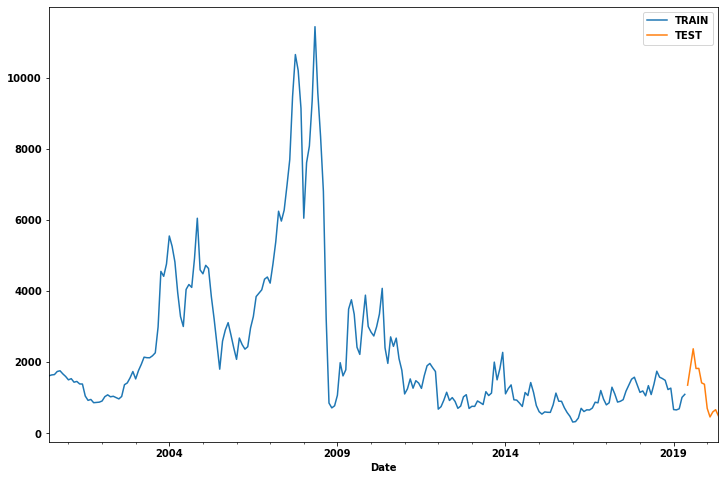

In [49]:
train_data.plot(legend=True,label='TRAIN')
test_data.plot(legend=True,label='TEST',figsize=(12,8));

In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
triple_model = ExponentialSmoothing(train_data,trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = triple_model.forecast(12).rename('TES Forecast')

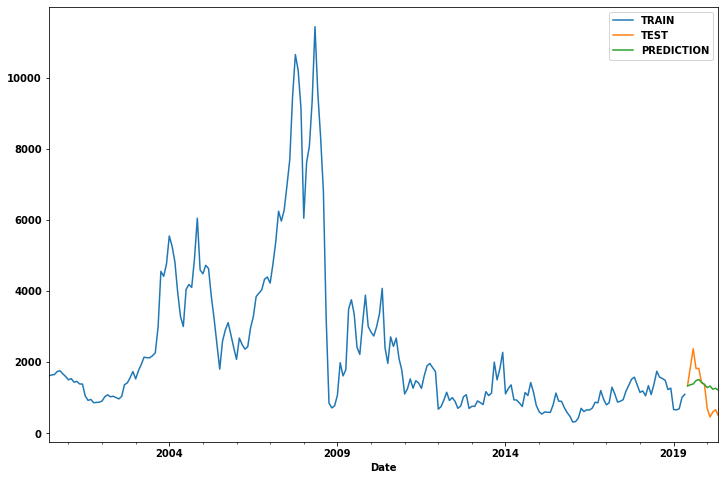

In [51]:
train_data.plot(legend=True,label='TRAIN')
test_data.plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [20]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(test_data,test_predictions))
print("RMS Error for TES is ",rms_error)

RMS Error for TES is  565.4812036531591


In [21]:
from sklearn.metrics import r2_score
r2_score(test_data, test_predictions)

0.1730222785341432

### Moving Average Model

predicted=1676.666667, expected=1616.000000
predicted=1629.000000, expected=1642.000000
predicted=1619.000000, expected=1652.000000
predicted=1636.666667, expected=1739.000000
predicted=1677.666667, expected=1504.000000
predicted=1631.666667, expected=861.000000
predicted=1368.000000, expected=868.000000
predicted=1077.666667, expected=876.000000
predicted=868.333333, expected=1537.000000
predicted=1093.666667, expected=1438.000000
predicted=1283.666667, expected=1459.000000
predicted=1478.000000, expected=1389.000000
predicted=1428.666667, expected=1386.000000
predicted=1411.333333, expected=1049.000000
predicted=1274.666667, expected=927.000000
predicted=1120.666667, expected=952.000000
predicted=976.000000, expected=908.000000
predicted=929.000000, expected=1417.000000
predicted=1092.333333, expected=1560.000000
predicted=1295.000000, expected=1738.000000
predicted=1571.666667, expected=1031.000000
predicted=1443.000000, expected=1082.000000
predicted=1283.666667, expected=1027.0000

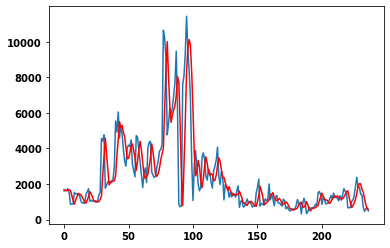

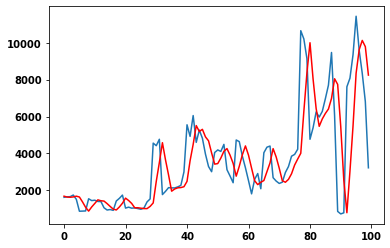

In [22]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = read_csv('BDI Monthly Price.csv', header=0, index_col=0)
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()

In [23]:
np.sqrt(error)

1388.282133681919